In [1]:
import geopandas as gpd
from shapely.geometry import Point
import pickle

In [2]:
!ls

GEDI02_A_002_GranuleList_20240516130017.txt
GEDI02_A_2019108185228_O01971_03_T00922_02_003_01_V002.h5
NYSPoly.ipynb
NYS_Civil_Boundaries.geojson
README.md
ShotFilter.ipynb
__pycache__
data
download.py
get_nys_data.py
nys_simple_boundaries.pickle
subset.py
test_download.py
venv


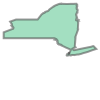

In [3]:
# load state borders from geojson
gdf = gpd.read_file("NYS_Civil_Boundaries.geojson")
nys = gdf["geometry"][0]
nys

In [4]:
# test containments
syracuse = Point(-76.1274, 43.0481)
scranton = Point(-75.6624, 41.4090)
usniagara = Point(-79.04715, 43.092461)
canniagara = Point(-79.106667, 43.060001)
print(nys.contains(syracuse))
print(nys.contains(scranton))
print(nys.contains(usniagara))
print(nys.contains(canniagara))

True
False
True
False


In [5]:
# simplify polygon and confirm results
simple = nys.simplify(0.01)

In [6]:
# save simple poly
with open("nys_simple_boundaries.pickle", "wb") as file:
    pickle.dump(simple, file)

In [7]:
# test load and confirm results
with open("nys_simple_boundaries.pickle", "rb") as file:
    simple = pickle.load(file)

print(simple.contains(syracuse))
print(simple.contains(scranton))
print(simple.contains(usniagara))
print(simple.contains(canniagara))

True
False
True
False


In [19]:
import pandas as pd
!ls data

GEDI02_A_2019108185228_O01971_03_T00922_02_003_01_V002.csv
GEDI02_A_2019110123502_O01998_02_T04759_02_003_01_V002.csv
GEDI02_A_2019110184547_O02002_03_T01917_02_003_01_V002.csv
GEDI02_A_2019111175606_O02017_03_T00203_02_003_01_V002.csv
GEDI02_A_2019112122821_O02029_02_T04331_02_003_01_V002.csv
GEDI02_A_2019112170625_O02032_03_T04181_02_003_01_V002.csv
GEDI02_A_2019113113840_O02044_02_T01194_02_003_01_V002.csv


In [20]:
!cat data/GEDI02_A_2019113113840_O02044_02_T01194_02_003_01_V002.csv

,beam,channel,lat_lowestmode,lon_lowestmode,elev_lowestmode,delta_time,rh,land_cover_data/landsat_water_persistence,land_cover_data/landsat_treecover,shot_number
99350,2,1,41.99988667520413,-77.33474543871557,377.56552,41256991.5083519,"[-4.56 -4.23 -3.93 -3.7  -3.52 -3.33 -3.18 -3.03 -2.92 -2.8  -2.69 -2.58
 -2.47 -2.39 -2.28 -2.2  -2.13 -2.05 -1.94 -1.87 -1.79 -1.72 -1.64 -1.61
 -1.53 -1.46 -1.38 -1.31 -1.27 -1.19 -1.12 -1.08 -1.01 -0.93 -0.89 -0.82
 -0.78 -0.71 -0.67 -0.59 -0.56 -0.48 -0.44 -0.37 -0.33 -0.26 -0.22 -0.14
 -0.11 -0.03  0.    0.07  0.11  0.18  0.22  0.29  0.33  0.41  0.44  0.52
  0.56  0.63  0.71  0.74  0.82  0.86  0.93  1.01  1.04  1.12  1.19  1.27
  1.34  1.42  1.46  1.53  1.64  1.72  1.79  1.87  1.94  2.05  2.13  2.24
  2.35  2.47  2.58  2.69  2.84  2.99  3.14  3.29  3.48  3.7   3.93  4.19
  4.53  4.98  5.54  6.21  7.04]",0,0.0,20440200200099351
99400,2,1,42.01469937115437,-77.30655541529785,418.5196,41256991.9215519,"[-3.74 -3.4  -3.14 -2.95 -2.77 -2.62 -2.5  -2.35

In [21]:
int("1")

1